In [1]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [4]:
def read_frames_from_folder(folder_path,num_des_fr):
    frame_files = sorted(os.listdir(folder_path))
    frames = []
    for frame_file in frame_files[:num_des_fr]:
        frame_path = os.path.join(folder_path, frame_file)
        frame = cv.imread(frame_path, cv.IMREAD_GRAYSCALE)
        if frame is not None:
            frames.append(frame)
    return frames

In [55]:
def frequency_domain_analysis(frames, pixel1, pixel2, frame_rate):
    frame_count = len(frames)
    frame_height, frame_width = frames[0].shape

    # Extract the time series for the specified pixels
    time_series1 = np.array([frame[pixel1[0], pixel1[1]] for frame in frames])
    time_series2 = np.array([frame[pixel2[0], pixel2[1]] for frame in frames])

    # Apply the Fourier Transform to the time series data
    sp1 = np.fft.fft(time_series1)
    sp2 = np.fft.fft(time_series2)

    # Compute the phase difference between the two signals
    phase_difference = np.angle(sp2) - np.angle(sp1)

    # Compute the frequency axis
    freqs = np.fft.fftfreq(frame_count, 1/frame_rate)

    px2um = 1e-6

    # Calculate the phase velocity at each frequency
    distance = np.linalg.norm(np.array(pixel1) - np.array(pixel2)) * px2um
    phase_velocity = distance / (phase_difference / (2 * np.pi * freqs))

    return freqs, phase_velocity, phase_difference

/var/folders/vj/3_h6tw0d0c54j62h3ppjflww0000gn/T/ipykernel_20044/3641567477.py:23: RuntimeWarning: invalid value encountered in divide
  phase_velocity = distance / (phase_difference / (2 * np.pi * freqs))


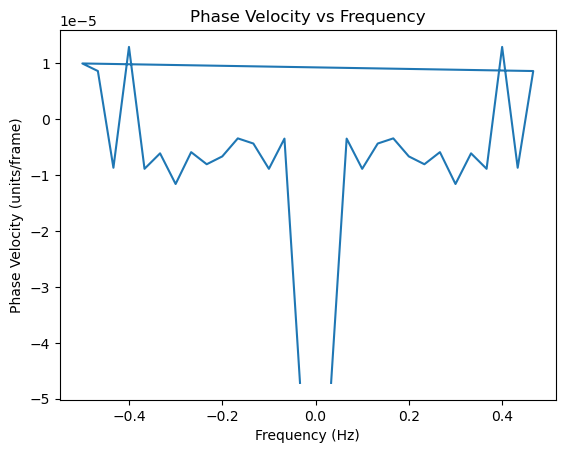

In [56]:
# Load frames and set frame rate
folder_path = 'sim_1perc_crop'
num_frames = 30
frame_rate = 1

frames = read_frames_from_folder(folder_path,num_frames)
# Select two pixel locations in the same column
pixel1 = (10, 10)
pixel2 = (20, 10)

# Perform frequency-domain analysis
freqs, phase_velocity, phase_difference = frequency_domain_analysis(frames, pixel1, pixel2, frame_rate)
# print(freqs, phase_velocity, phase_difference)

# Plot the phase velocity as a function of frequency
plt.plot(freqs, phase_velocity)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Velocity (units/frame)')
plt.title('Phase Velocity vs Frequency')
plt.show()

In [44]:
def estimate_shear_wave_speed(frames, pixel, reference_pixel, frame_rate, freq_range):
    freqs, phase_velocity, phase_difference = frequency_domain_analysis(frames, pixel, reference_pixel, frame_rate)

    # Find indices of the frequency range of interest
    freq_indices = np.where((freqs >= freq_range[0]) & (freqs <= freq_range[1]))

    # Calculate the average or median phase velocity within the chosen frequency range
    shear_wave_speed = np.mean(phase_velocity[freq_indices])

    return shear_wave_speed

In [57]:
frame_height, frame_width = frames[0].shape
column_index = 20  # Choose a column index
reference_pixel = (10, column_index)  # Choose a reference pixel in the same column
frame_rate = 30e3
freq_range = (10e3, 20e3)  # Choose a relevant frequency range

column_shear_wave_speed = np.zeros(frame_height)

for pixel_y in range(frame_height):
    pixel = (pixel_y, column_index)
    shear_wave_speed = estimate_shear_wave_speed(frames, pixel, reference_pixel, frame_rate, freq_range)
    column_shear_wave_speed[pixel_y] = shear_wave_speed
print(column_shear_wave_speed)


# plt.figure()
# plt.imshow(column_shear_wave_speed)
# plt.colorbar()

[ 5.04916983e-01  1.15014843e-01  2.08801843e-01  3.67033155e-01
  4.77418735e-01  1.51826005e-01  9.45716745e-03  3.62844597e-02
  5.13868691e-02 -3.26652280e-02             nan  2.00122029e-01
  2.00060899e-01  2.33694898e-01  2.06522629e-01  2.07811142e-01
  1.53041133e-01  7.67373158e-02  7.24902040e-02  7.60925173e-02
  8.57840749e-02  7.22033570e-02  6.22637736e-02  7.76361377e-02
  6.16291553e-02  4.83047605e-02  2.50207852e-01  5.96337291e-01
 -3.15043174e+00  8.82973072e-01  1.05264554e+00  8.99936261e+01
 -3.04378562e-01  2.90668713e-01  4.86434839e-01  3.81884942e-01
  6.48729676e-01  3.51257369e-01  4.36946530e-01  5.84255076e-01
  5.96547908e-02 -2.01955942e-02  1.09251092e-01 -4.98217850e-02
 -2.21454602e+00 -9.86791973e-01 -1.08330268e+00 -1.17491119e+00
 -1.01097682e+00 -1.14854926e+00 -1.35921539e+00 -1.50348860e+00
 -2.22980862e+00 -3.98353657e+00 -5.38343121e+00  7.23277228e+00
  3.95119545e+00  3.24934323e+00  3.85398996e+00  5.39379964e+00
  3.62075269e+00  3.85668

/var/folders/vj/3_h6tw0d0c54j62h3ppjflww0000gn/T/ipykernel_20044/3641567477.py:23: RuntimeWarning: invalid value encountered in divide
  phase_velocity = distance / (phase_difference / (2 * np.pi * freqs))


/var/folders/vj/3_h6tw0d0c54j62h3ppjflww0000gn/T/ipykernel_20044/3641567477.py:23: RuntimeWarning: invalid value encountered in divide
  phase_velocity = distance / (phase_difference / (2 * np.pi * freqs))
/var/folders/vj/3_h6tw0d0c54j62h3ppjflww0000gn/T/ipykernel_20044/3641567477.py:23: RuntimeWarning: divide by zero encountered in divide
  phase_velocity = distance / (phase_difference / (2 * np.pi * freqs))


[[ 1.74422778  1.67482201  1.54597702 ...  0.82119494  0.78966531
   0.87200762]
 [ 1.71413066  1.51415844  1.56365916 ...  0.52781825  0.54522753
   0.62597162]
 [ 1.24657562  1.33733641  1.07258657 ...  1.15749014  1.46299984
   1.55858497]
 ...
 [13.30436693 13.28245377 13.2616309  ...  6.08570577  7.67205846
  12.10400608]
 [12.71419854 12.69363094 12.67408723 ... 11.303884    7.66282506
   7.43304627]
 [ 9.45558423  9.44055854  9.42628125 ...  4.65263397  6.88989157
   6.73503076]]


array([[ 1.74422778,  1.67482201,  1.54597702, ...,  0.82119494,
         0.78966531,  0.87200762],
       [ 1.71413066,  1.51415844,  1.56365916, ...,  0.52781825,
         0.54522753,  0.62597162],
       [ 1.24657562,  1.33733641,  1.07258657, ...,  1.15749014,
         1.46299984,  1.55858497],
       ...,
       [13.30436693, 13.28245377, 13.2616309 , ...,  6.08570577,
         7.67205846, 12.10400608],
       [12.71419854, 12.69363094, 12.67408723, ..., 11.303884  ,
         7.66282506,  7.43304627],
       [ 9.45558423,  9.44055854,  9.42628125, ...,  4.65263397,
         6.88989157,  6.73503076]])

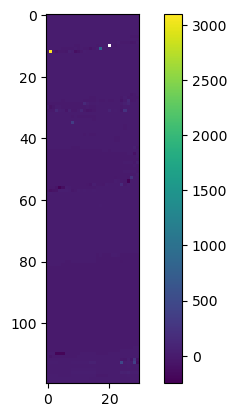

In [58]:
map_shear_wave_speed = np.zeros([frame_height,frame_width])
for pixel_x in range(frame_width):
    for pixel_y in range(frame_height):
        pixel = (pixel_y, pixel_x)
        shear_wave_speed = estimate_shear_wave_speed(frames, pixel, reference_pixel, frame_rate, freq_range)
        map_shear_wave_speed[pixel_y,pixel_x] = shear_wave_speed
print(map_shear_wave_speed)
plt.figure()
plt.imshow(map_shear_wave_speed)
plt.colorbar()
map_shear_wave_speed



In [63]:
# finding median slope (positive), not including nan values
copy_map_shear_wave_speed = map_shear_wave_speed
nan_array = np.isnan(copy_map_shear_wave_speed)
not_nan_array = ~ nan_array
speed_notnan = copy_map_shear_wave_speed[not_nan_array]
replacement_value = np.median(speed_notnan)
replacement_value 

0.10759537468538469

In [64]:
#same value as above
for i in range(copy_map_shear_wave_speed.shape[0]):
    for j in range(copy_map_shear_wave_speed.shape[1]):
        if copy_map_shear_wave_speed[i,j]>10*replacement_value:
            copy_map_shear_wave_speed[i,j] = replacement_value
        elif np.isnan(copy_map_shear_wave_speed[i,j]):
            copy_map_shear_wave_speed[i,j] = replacement_value
copy_map_shear_wave_speed

0.10759537468538469

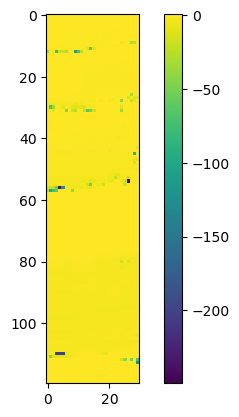

In [65]:
plt.figure()
plt.imshow(copy_map_shear_wave_speed)
plt.colorbar()